In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipykernel_13/406637518.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Charges')

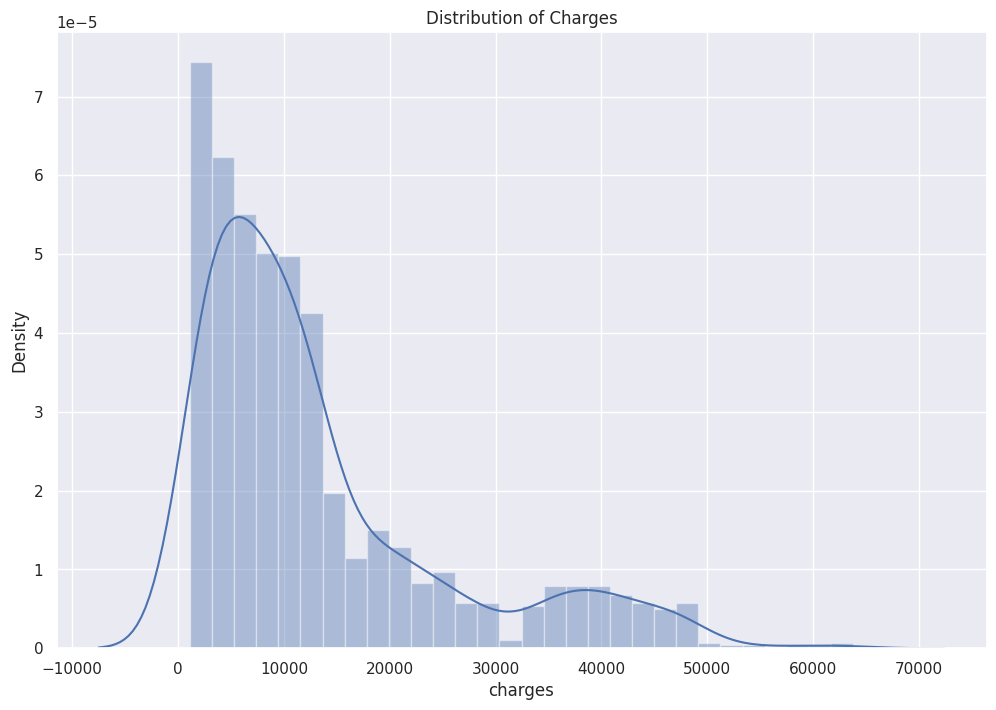

In [8]:
sns.set(style='darkgrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True)
plt.title('Distribution of Charges')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

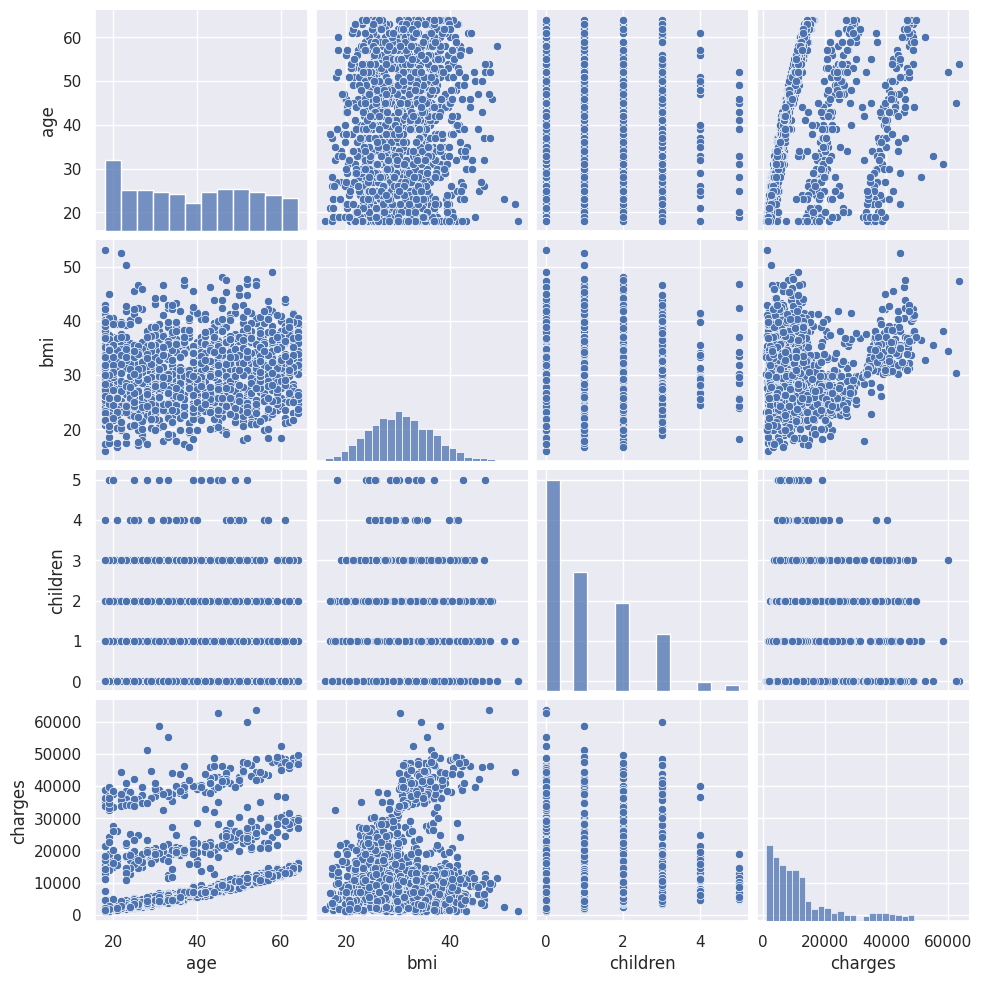

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new = df.copy()
df_new["sex"] = le.fit_transform(df_new["sex"])
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [11]:
df_new["smoker"] = le.fit_transform(df_new["smoker"])
df_new["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [12]:
df_new["smoker"].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[['southeast','southwest','northeast','northwest']])
df_new["region"] = ordinal.fit_transform(df_new[["region"]])

In [14]:
df_new["region"].value_counts()

region
0.0    364
1.0    325
3.0    325
2.0    324
Name: count, dtype: int64

In [15]:
df = df_new
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.3 KB


In [16]:
X = df.drop("charges",axis=1)
y = df["charges"]

In [17]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1.0
1,18,1,33.770,1,0,0.0
2,28,1,33.000,3,0,0.0
3,33,1,22.705,0,0,3.0
4,32,1,28.880,0,0,3.0


In [18]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
X_train.shape

(1003, 6)

In [21]:
X_test.shape

(335, 6)

In [22]:
X_train.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.012385,0.111325,0.055070,-0.037916,0.017079
sex,-0.012385,1.000000,0.001931,0.016610,0.054671,0.038829
bmi,0.111325,0.001931,1.000000,-0.003459,-0.001499,-0.236414
children,0.055070,0.016610,-0.003459,1.000000,0.025488,0.046043
smoker,-0.037916,0.054671,-0.001499,0.025488,1.000000,-0.036118
region,0.017079,0.038829,-0.236414,0.046043,-0.036118,1.000000


<Axes: >

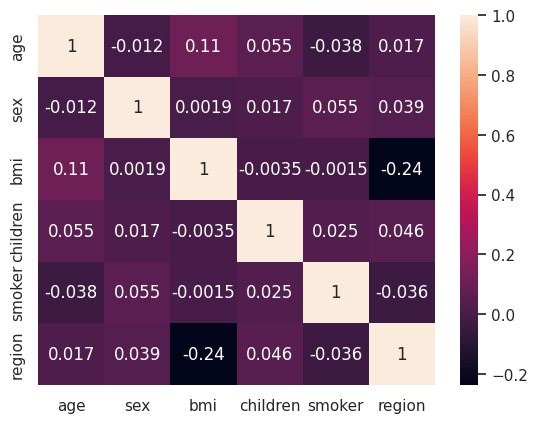

In [23]:
sns.heatmap(X_train.corr(),annot=True)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_13/2056525858.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


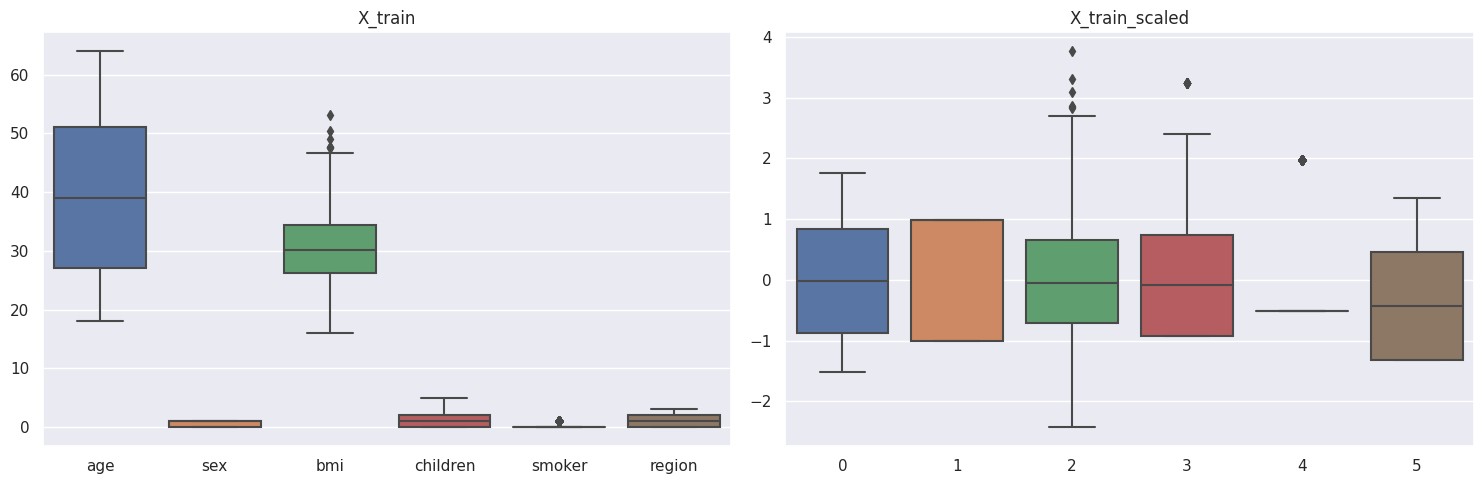

In [26]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.tight_layout()
plt.show()


In [27]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LassoCV,RidgeCV,ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [28]:
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : " ,mae)
print("Mean Squared Error : " ,mse)
print("R2 Score : " ,score)

Mean Absolute Error :  4245.940270673539
Mean Squared Error :  35195812.394489795
R2 Score :  0.7667469908213234


In [29]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : " ,mae)
print("Mean Squared Error : " ,mse)
print("R2 Score : " ,score)

Mean Absolute Error :  4245.943798462045
Mean Squared Error :  35196626.364902176
R2 Score :  0.7667415963997954


In [30]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : " ,mae)
print("Mean Squared Error : " ,mse)
print("R2 Score : " ,score)



Mean Absolute Error :  4247.688867824911
Mean Squared Error :  35201529.554892465
R2 Score :  0.7667091015163988


In [31]:
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : " ,mae)
print("Mean Squared Error : " ,mse)
print("R2 Score : " ,score)


Mean Absolute Error :  5252.680900834229
Mean Squared Error :  49304647.70989931
R2 Score :  0.6732435860287442


In [32]:
lassoCV = LassoCV(cv=5)
lassoCV.fit(X_train_scaled,y_train)
y_pred = lassoCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : " ,mae)
print("Mean Squared Error : " ,mse)
print("R2 Score : " ,score)


Mean Absolute Error :  4252.65960022766
Mean Squared Error :  35373812.29754195
R2 Score :  0.7655673330667284


In [33]:
ridgeCV = RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred = ridgeCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : " ,mae)
print("Mean Squared Error : " ,mse)
print("R2 Score : " ,score)


Mean Absolute Error :  4263.253359951186
Mean Squared Error :  35262224.33334213
R2 Score :  0.7663068593531512


In [34]:
elasticCV = ElasticNetCV(cv=5)
elasticCV.fit(X_train_scaled,y_train)
y_pred = elasticCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : " ,mae)
print("Mean Squared Error : " ,mse)
print("R2 Score : " ,score)


Mean Absolute Error :  8570.79633233997
Mean Squared Error :  130092939.4993197
R2 Score :  0.13783579503718024
